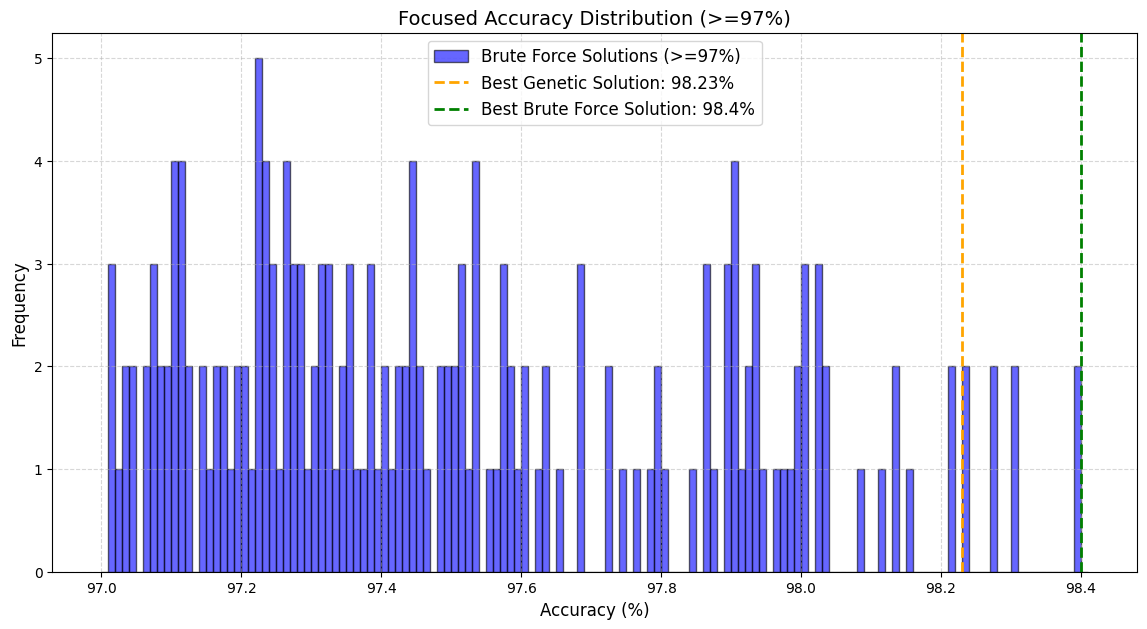

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt

# Load and parse the provided log file for brute force accuracy extraction
file_path = 'brute-log.txt'  # Đặt tên file log tại đây

# Extracting accuracy values from the file
brute_force_accuracies = []

with open(file_path, 'r') as file:
    for line_number, line in enumerate(file):
        # Stop reading after line 1344
        if line_number >= 1344:
            break
        # Extract accuracy from lines that contain 'Network accuracy'
        if "Network accuracy" in line:
            match = re.search(r"Network accuracy: (\d+\.\d+)%", line)
            if match:
                brute_force_accuracies.append(float(match.group(1)))

# Best solution from Genetic Algorithm
genetic_best_accuracy = 98.23

# Filter accuracy data to focus on higher values (>= 97%)
filtered_accuracies = [acc for acc in brute_force_accuracies if acc >= 97]

# Define bins for high accuracy range with small step size
high_res_bins = np.arange(97, max(filtered_accuracies) + 0.01, 0.01)

plt.figure(figsize=(14, 7))
plt.hist(filtered_accuracies, bins=high_res_bins, color="blue", alpha=0.6, label="Brute Force Solutions (>=97%)", edgecolor="black")

# Highlight the best solutions
plt.axvline(genetic_best_accuracy, color="orange", linestyle="--", linewidth=2, label=f"Best Genetic Solution: {genetic_best_accuracy}%")
best_brute_force_accuracy = max(brute_force_accuracies)
plt.axvline(best_brute_force_accuracy, color="green", linestyle="--", linewidth=2, label=f"Best Brute Force Solution: {best_brute_force_accuracy}%")

# Adding labels and legend
plt.title("Focused Accuracy Distribution (>=97%)", fontsize=14)
plt.xlabel("Accuracy (%)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()
